In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('covid.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fever             35000 non-null  float64
 1   cough             35000 non-null  int64  
 2   fatigue           35000 non-null  int64  
 3   loss_smell_taste  35000 non-null  int64  
 4   nasal_congestion  35000 non-null  int64  
 5   red_eyes          35000 non-null  int64  
 6   sore_throat       35000 non-null  int64  
 7   headache          35000 non-null  int64  
 8   muscle_pain       35000 non-null  int64  
 9   skin_rash         35000 non-null  int64  
 10  vomiting          35000 non-null  int64  
 11  diarrhea          35000 non-null  int64  
 12  breathing_issue   35000 non-null  int64  
 13  loss_apetite      35000 non-null  int64  
 14  chest_pain        35000 non-null  int64  
 15  age               35000 non-null  int64  
 16  covid_level       35000 non-null  int64 

In [4]:
data.columns

Index(['fever', 'cough', 'fatigue', 'loss_smell_taste', 'nasal_congestion',
       'red_eyes', 'sore_throat', 'headache', 'muscle_pain', 'skin_rash',
       'vomiting', 'diarrhea', 'breathing_issue', 'loss_apetite', 'chest_pain',
       'age', 'covid_level'],
      dtype='object')

In [5]:
#EDA

In [6]:
data.isnull().any()

fever               False
cough               False
fatigue             False
loss_smell_taste    False
nasal_congestion    False
red_eyes            False
sore_throat         False
headache            False
muscle_pain         False
skin_rash           False
vomiting            False
diarrhea            False
breathing_issue     False
loss_apetite        False
chest_pain          False
age                 False
covid_level         False
dtype: bool

In [7]:
data.isnull().sum()

fever               0
cough               0
fatigue             0
loss_smell_taste    0
nasal_congestion    0
red_eyes            0
sore_throat         0
headache            0
muscle_pain         0
skin_rash           0
vomiting            0
diarrhea            0
breathing_issue     0
loss_apetite        0
chest_pain          0
age                 0
covid_level         0
dtype: int64

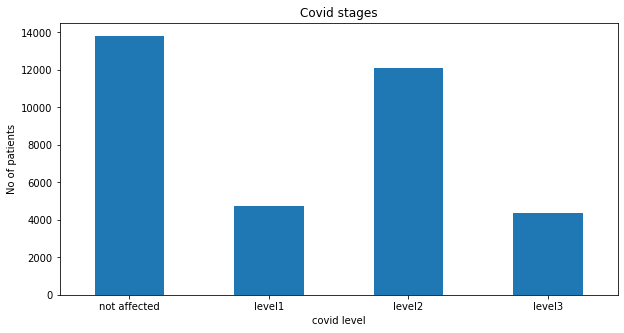

In [11]:
plt.figure(figsize=(10,5))
pd.value_counts(data['covid_level']).sort_index().plot.bar()
plt.title("Covid stages")
plt.xlabel("covid level")
plt.ylabel("No of patients")
plt.xticks([0,1,2,3],['not affected','level1','level2','level3'],rotation=0)
plt.show()

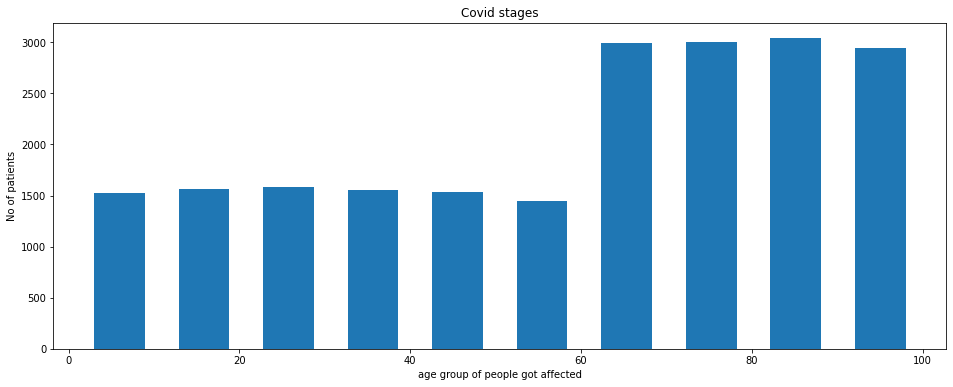

In [14]:
plt.figure(figsize=(16,6))
#pd.value_counts(data['age'][data['covid_level']!=0]).sort_index().plot.bar()
data['age'][data['covid_level']!=0].plot.hist(rwidth=0.6)
plt.title("Covid stages")
plt.xlabel("age group of people got affected")
plt.ylabel("No of patients")
plt.xticks(rotation=0)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X=data[['fever','cough','fatigue','loss_smell_taste','nasal_congestion','red_eyes','sore_throat','headache','muscle_pain','skin_rash','vomiting','diarrhea','breathing_issue','loss_apetite','chest_pain','age']]

In [17]:
X.shape

(35000, 16)

In [18]:
y=data['covid_level']

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [20]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(random_state=0,max_iter=3000)
LR.fit(X_train, y_train)
p1=LR.score(X_test,y_test)*100
print(p1)

72.44285714285714


In [21]:
from sklearn.ensemble import AdaBoostClassifier
ADA=AdaBoostClassifier()
ADA.fit(X_train, y_train)
p2=ADA.score(X_test,y_test)*100
print(p2)


61.75714285714285


In [22]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(max_features='auto', n_estimators=200)
RF.fit(X_train, y_train)
p3=RF.score(X_test,y_test)*100
print(p3)

99.64285714285714


In [23]:
from sklearn.tree import DecisionTreeClassifier
DC=DecisionTreeClassifier()
DC.fit(X_train, y_train)
p4=DC.score(X_test,y_test)*100
print(p4)

99.58571428571429


In [24]:
from sklearn.naive_bayes import GaussianNB
GB=GaussianNB()
GB.fit(X_train,y_train)
p5=GB.score(X_test,y_test)*100
print(p5)

73.8


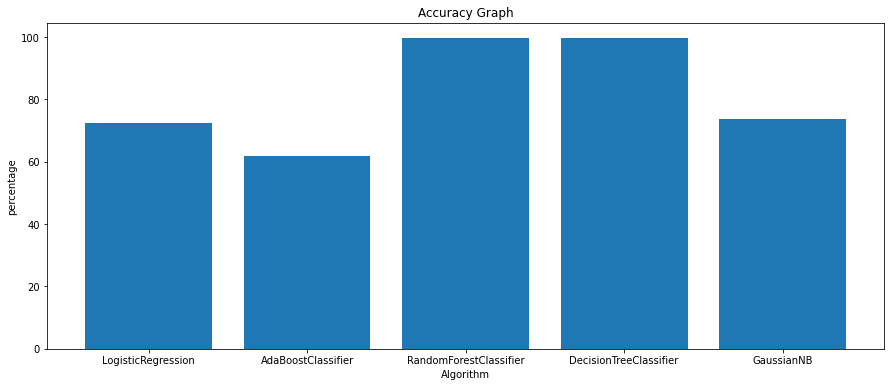

In [25]:
a=["LogisticRegression","AdaBoostClassifier","RandomForestClassifier","DecisionTreeClassifier","GaussianNB"]
b=[p1,p2,p3,p4,p5]
plt.figure(figsize=(15,6))
plt.bar(a,b)
plt.title("Accuracy Graph")
plt.xlabel("Algorithm")
plt.ylabel("percentage")
plt.show()

In [26]:
import pickle
with open("model.pkl","wb") as f:
    pickle.dump(RF,f)